In [25]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn') 
sns.set(font_scale=2.5) # 편의를 위해 이 두 설정을 고정적으로 함

import missingno as msno # 결측값들을 쉽게 볼 수 있는 라이브러리

import warnings
warnings.filterwarnings('ignore') # 라이브러리 업데이트를 하면 다른 커맨드를 추천하는 경우가 있는데 이를 무시

%matplotlib inline 
# 이 노트북 창 안에서 결과를 확인할 수 있다. 새 윈도우로 뜨는 것 방지



# 1. 데이터 확인

In [28]:
df_train = pd.read_csv("/kaggle/input/titanic/train.csv")
df_test = pd.read_csv("/kaggle/input/titanic/test.csv") # 데이터 불러오기

In [29]:
df_train.head() # 상위 5행 확인

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [30]:
df_train.describe() # train 기술통계량 확인

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [31]:
df_test.describe() # test 기술통계량 확인

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [32]:
for col in df_train.columns:
    msg = 'column: {:>10}\t Percent of NaN value: {:.2f}%'.format(col, 100 * (df_train[col].isnull().sum() / df_train[col].shape[0]))
    print(msg)

column: PassengerId	 Percent of NaN value: 0.00%
column:   Survived	 Percent of NaN value: 0.00%
column:     Pclass	 Percent of NaN value: 0.00%
column:       Name	 Percent of NaN value: 0.00%
column:        Sex	 Percent of NaN value: 0.00%
column:        Age	 Percent of NaN value: 19.87%
column:      SibSp	 Percent of NaN value: 0.00%
column:      Parch	 Percent of NaN value: 0.00%
column:     Ticket	 Percent of NaN value: 0.00%
column:       Fare	 Percent of NaN value: 0.00%
column:      Cabin	 Percent of NaN value: 77.10%
column:   Embarked	 Percent of NaN value: 0.22%


train에 Age와 Cabin Embarked에 결측값 있음

In [33]:
for col in df_test.columns:
    msg = 'column: {:>10}\t Percent of NaN value: {:.2f}%'.format(col, 100 * (df_test[col].isnull().sum() / df_test[col].shape[0]))
    print(msg)

column: PassengerId	 Percent of NaN value: 0.00%
column:     Pclass	 Percent of NaN value: 0.00%
column:       Name	 Percent of NaN value: 0.00%
column:        Sex	 Percent of NaN value: 0.00%
column:        Age	 Percent of NaN value: 20.57%
column:      SibSp	 Percent of NaN value: 0.00%
column:      Parch	 Percent of NaN value: 0.00%
column:     Ticket	 Percent of NaN value: 0.00%
column:       Fare	 Percent of NaN value: 0.24%
column:      Cabin	 Percent of NaN value: 78.23%
column:   Embarked	 Percent of NaN value: 0.00%


test에 Age랑 Cabin, Fare에 결측값이 있는 것 확인

<AxesSubplot: >

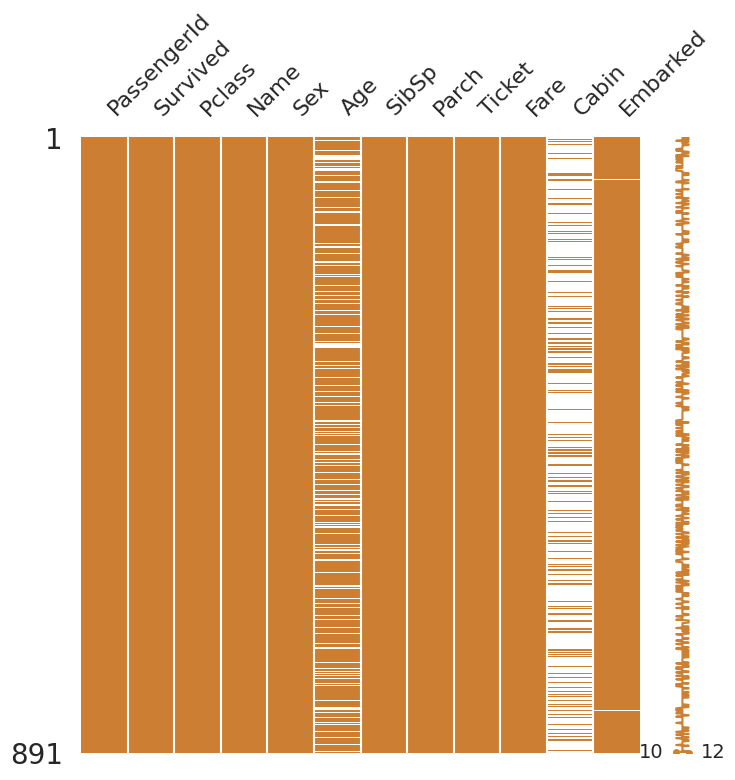

In [34]:
msno.matrix(df=df_train.iloc[:, :], figsize=(8, 8), color=(0.8, 0.5, 0.2)) 

msno.matrix - 결측값 있는곳 시각화해서 확인 가능

<AxesSubplot: >

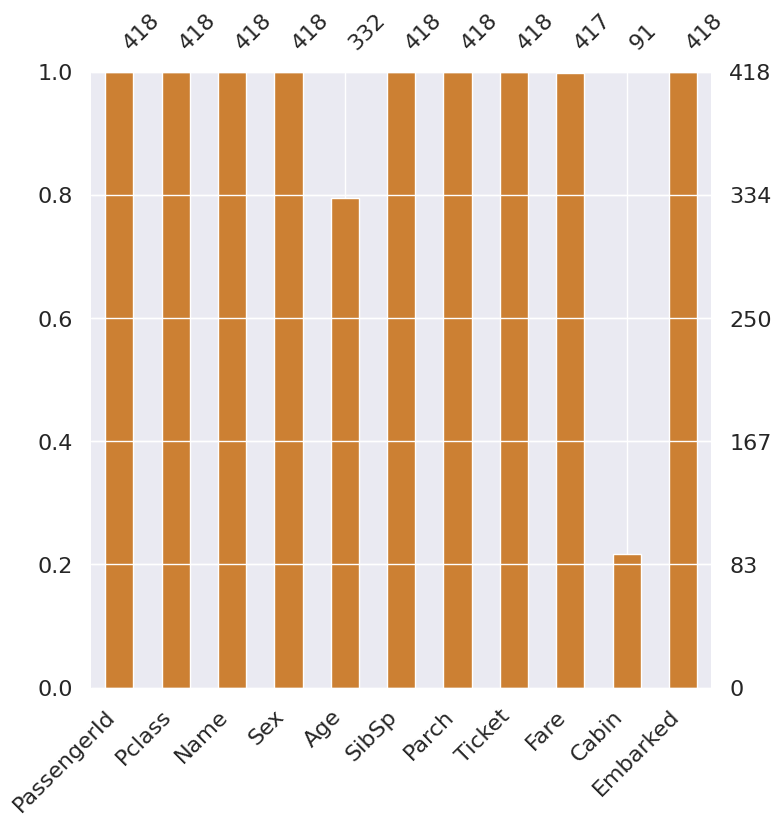

In [35]:
msno.bar(df=df_test.iloc[:, :], figsize=(8, 8), color=(0.8, 0.5, 0.2)) 

msno.bar - 결측값 퍼센트 확인 가능

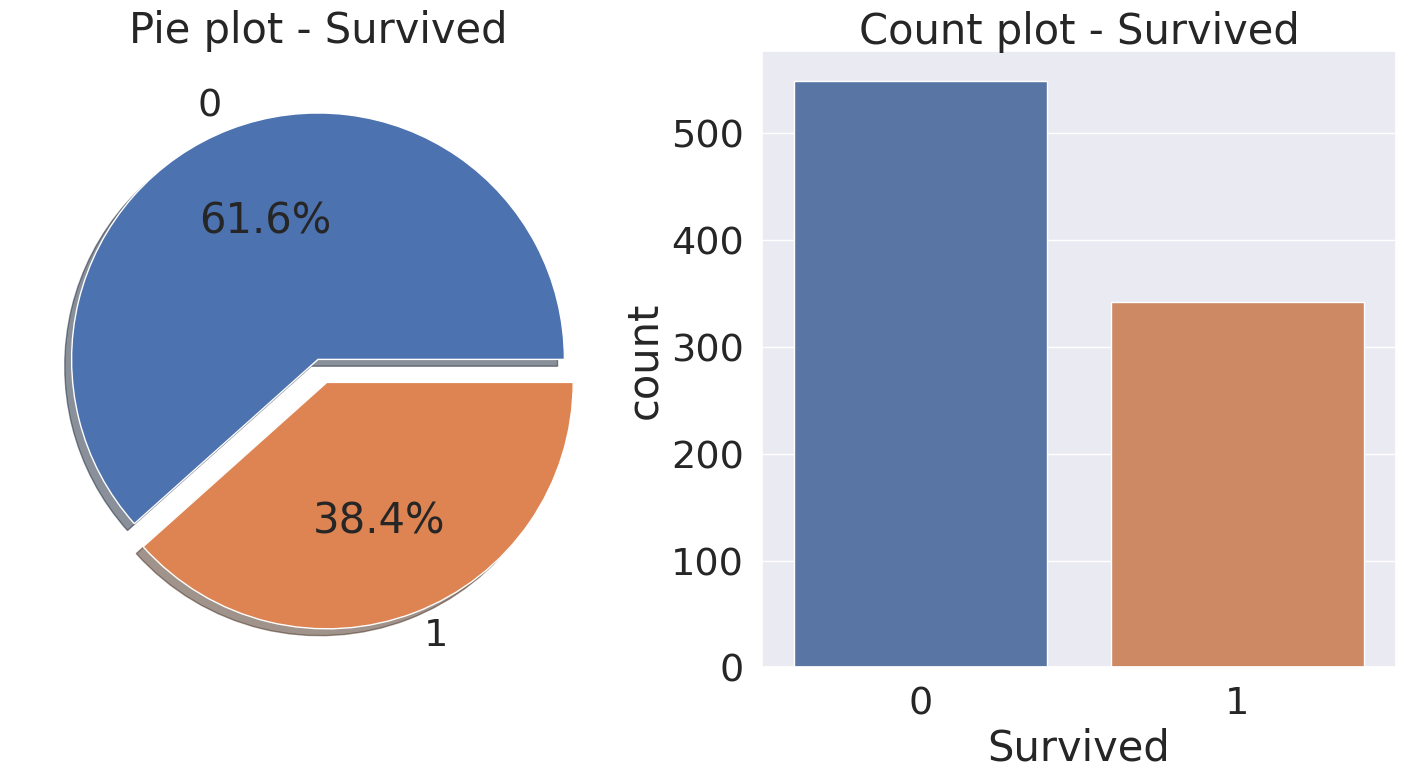

In [36]:
f, ax = plt.subplots(1, 2, figsize=(18, 8)) # subplot -> 하위 plot , 1행 2열, 가로18 세로 8

df_train['Survived'].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%', ax=ax[0], shadow=True) # explode - 구분, autopct - 퍼센트형식, ax - 위에서 설정한 1열과 2열 2개, shadow - 그림자
ax[0].set_title('Pie plot - Survived')
ax[0].set_ylabel('')
sns.countplot(x='Survived', data=df_train, ax=ax[1]) # 막대그래프로 비율 확인
ax[1].set_title('Count plot - Survived')

plt.show()

countplot() got multiple values for argument 'data' 오류 뜸 -> x='Survived'로 수정 후 해결 / 어떤 argument인지 명시해줄 것

생존자 1%, 사망자 99% 같은 극단적인 데이터의 경우 모델 정확도 또한 99% 혹은 1%로 극단적으로 나올 수 있음
'Survived' 의 경우 약 60 : 40으로 균일한 데이터이므로 사용하기 적절

글로 적는것보다 시각화하는 것이 간결하다

# 2. EDA

## pclass

In [37]:
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).count() # pclass별 개수 확인

,Survived
Pclass,
1,216
2,184
3,491


In [38]:
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).sum() # sum으로 더함 
# survived = 0,1로 이루어져있으므로 pclass별 생존자 수 확인가능

,Survived
Pclass,
1,136
2,87
3,119


In [39]:
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).mean()
# 1은 62.9%, 2는 47.2%, 3은 24.2% 생존

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


In [40]:
pd.crosstab(df_train['Pclass'], df_train['Survived'],margins=True).style.background_gradient(cmap='summer_r') # margins를 사용하면 All행과 열도 나옴
#style로 배경색 추가

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


<AxesSubplot: xlabel='Pclass'>

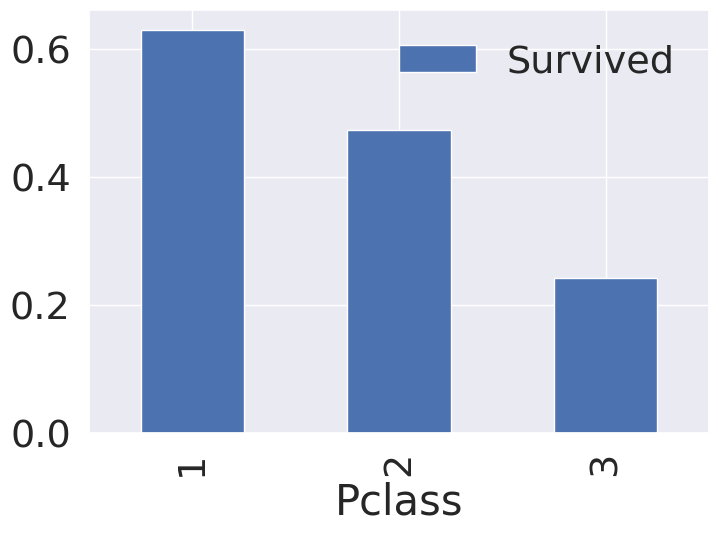

In [41]:
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar() # 막대그래프로 시각화

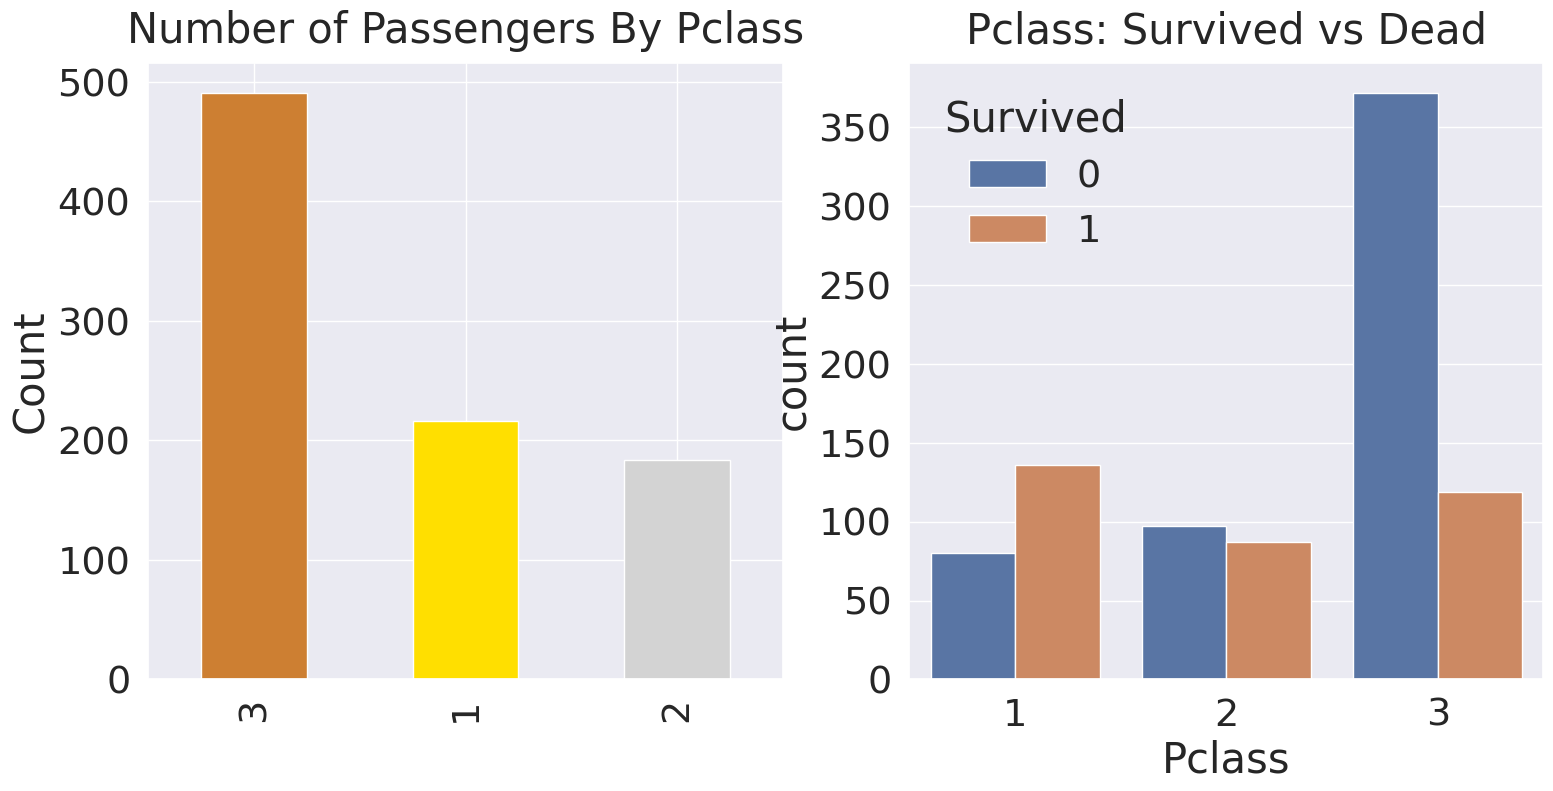

In [42]:
y_position = 1.02
f, ax = plt.subplots(1, 2, figsize=(18, 8))
df_train['Pclass'].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3'], ax=ax[0])
ax[0].set_title(label = 'Number of Passengers By Pclass', y=y_position)
ax[0].set_ylabel('Count')
sns.countplot(x = 'Pclass', hue='Survived', data=df_train, ax=ax[1])
ax[1].set_title('Pclass: Survived vs Dead', y=y_position)
plt.show()

시각화 결과 pclass가 1,2,3일때 생존률이 점점 줄어드는 것을 알 수 있다. 모델링에 사용하기 적합한 feature로 생각해볼 수 있다.

## sex

성별 또한 categorical feature이므로 pclass와 같은 방식으로 시각화할 것

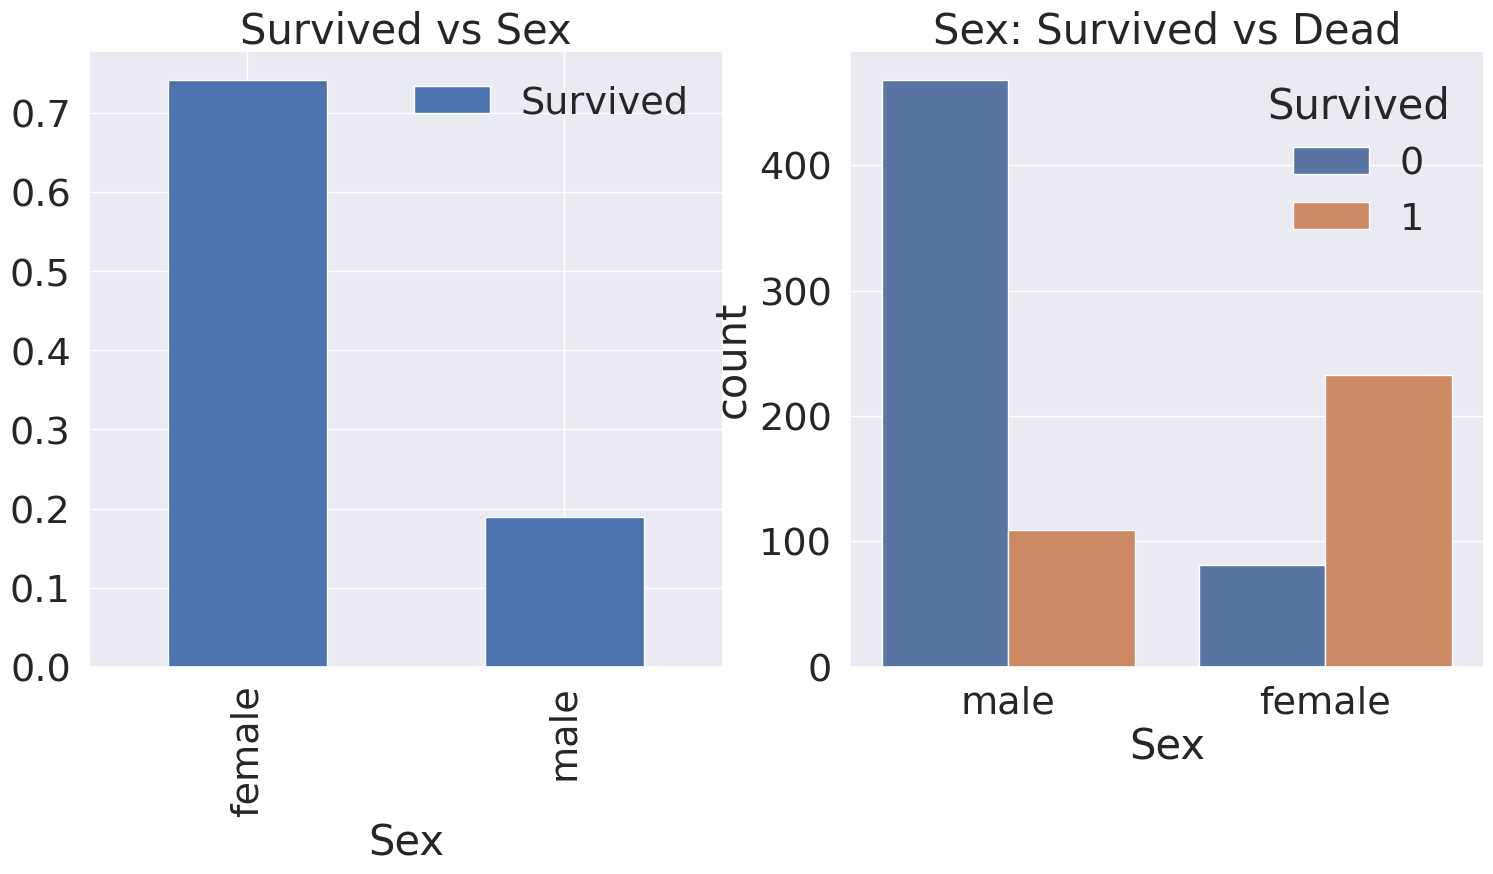

In [43]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))
df_train[['Sex', 'Survived']].groupby(['Sex'], as_index=True).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')
sns.countplot(x = 'Sex', hue='Survived', data=df_train, ax=ax[1])
ax[1].set_title('Sex: Survived vs Dead')
plt.show()

In [44]:
df_train[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False) # 성별에 따른 생존률 확인

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [45]:
pd.crosstab(df_train['Sex'], df_train['Survived'], margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Sex,,,
female,81,233,314
male,468,109,577
All,549,342,891


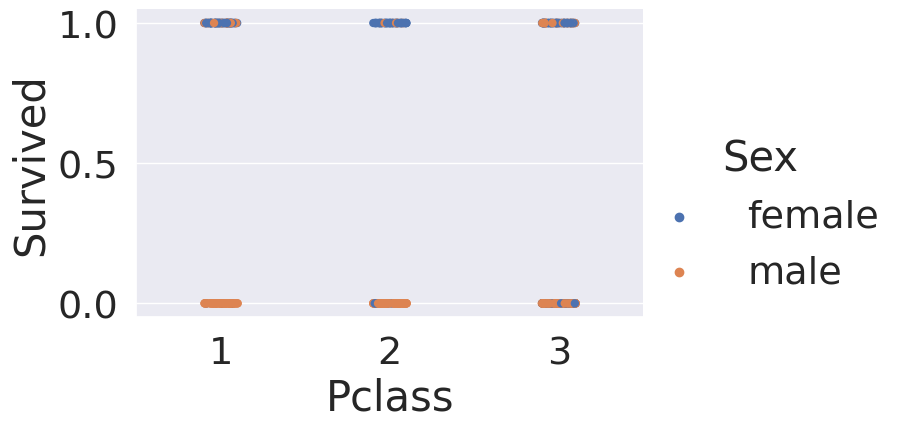

In [46]:
sns.catplot(hue = 'Sex', y='Survived', x = 'Pclass', data=df_train,
               size=6, aspect=1.5)

factorplot은 사라진듯.. 안됨 catplot은 강의같은 그래프 못 그리는듯

모든 클래스에서 생존률 female>male, 성별 상관없이 class 높을수록 생존 유리

## Age

In [47]:
print('제일 나이 많은 탑승객 : {:.1f} Years'.format(df_train['Age'].max()))
print('제일 어린 탑승객 : {:.1f} Years'.format(df_train['Age'].min()))
print('탑승객 평균 나이 : {:.1f} Years'.format(df_train['Age'].mean()))

제일 나이 많은 탑승객 : 80.0 Years
제일 어린 탑승객 : 0.4 Years
탑승객 평균 나이 : 29.7 Years


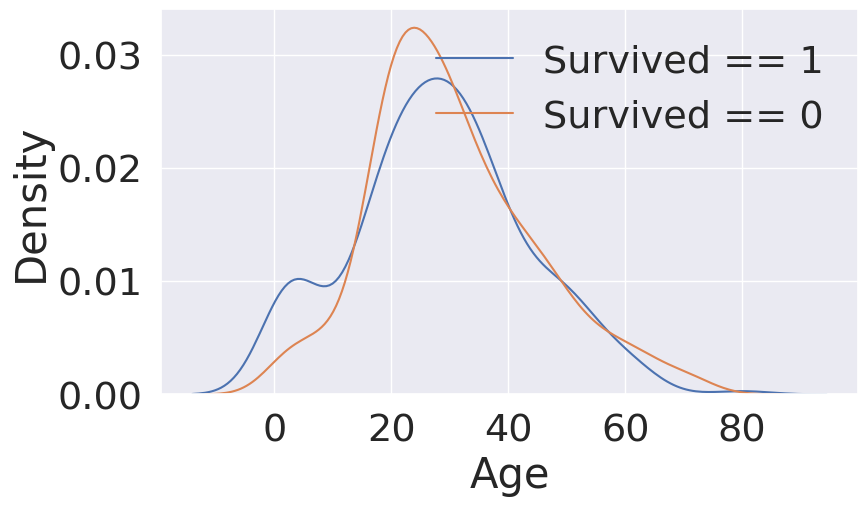

In [48]:
fig, ax = plt.subplots(1, 1, figsize=(9, 5))
sns.kdeplot(df_train[df_train['Survived'] == 1]['Age'], ax=ax)
sns.kdeplot(df_train[df_train['Survived'] == 0]['Age'], ax=ax)
plt.legend(['Survived == 1', 'Survived == 0'])
plt.show()

20대 중반정도의 나이를 가진 사람이 제일 많고, 평균 나이는 약 30세이다. 성별에 다른 나이 분포는 다르지 않다.

kdeplot = kernel density estimator plot / continuous한 자료에 사용하면 좋을듯?

<AxesSubplot: >

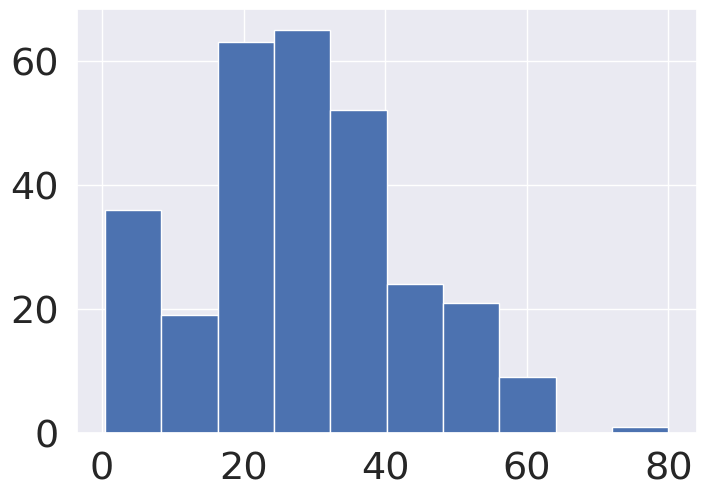

In [49]:
df_train[df_train['Survived'] == 1]['Age'].hist()

이런 히스토그램을 좀더 스무스하게 만들어서 그려준다.

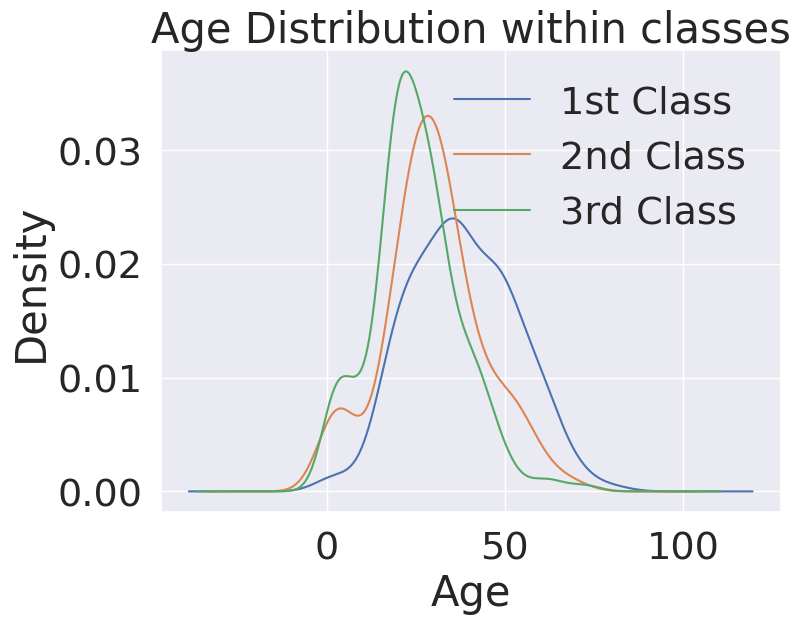

In [55]:
# Age distribution withing classes
plt.figure(figsize=(8, 6))
df_train['Age'][df_train['Pclass'] == 1].plot(kind='kde')
df_train['Age'][df_train['Pclass'] == 2].plot(kind='kde')
df_train['Age'][df_train['Pclass'] == 3].plot(kind='kde')

plt.xlabel('Age')
plt.title('Age Distribution within classes')
plt.legend(['1st Class', '2nd Class', '3rd Class'])

class가 좋을 수록 나이가 많은 사람의 비중이 높다.

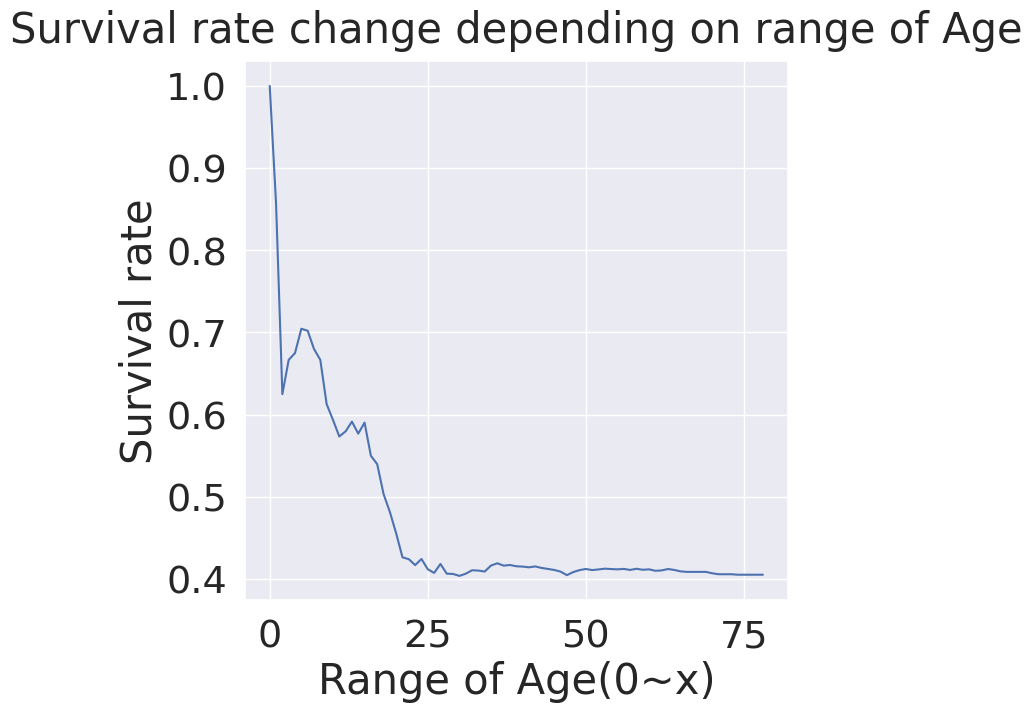

In [56]:
cummulate_survival_ratio = []
for i in range(1, 80):
    cummulate_survival_ratio.append(df_train[df_train['Age'] < i]['Survived'].sum() / len(df_train[df_train['Age'] < i]['Survived']))
    
plt.figure(figsize=(7, 7))
plt.plot(cummulate_survival_ratio)
plt.title('Survival rate change depending on range of Age', y=1.02)
plt.ylabel('Survival rate')
plt.xlabel('Range of Age(0~x)')
plt.show()

나이가 어릴수록 생존확률이 높고, 결국 40%에 수렴하는 것을 볼 수 있다.

## pclass, sex, age

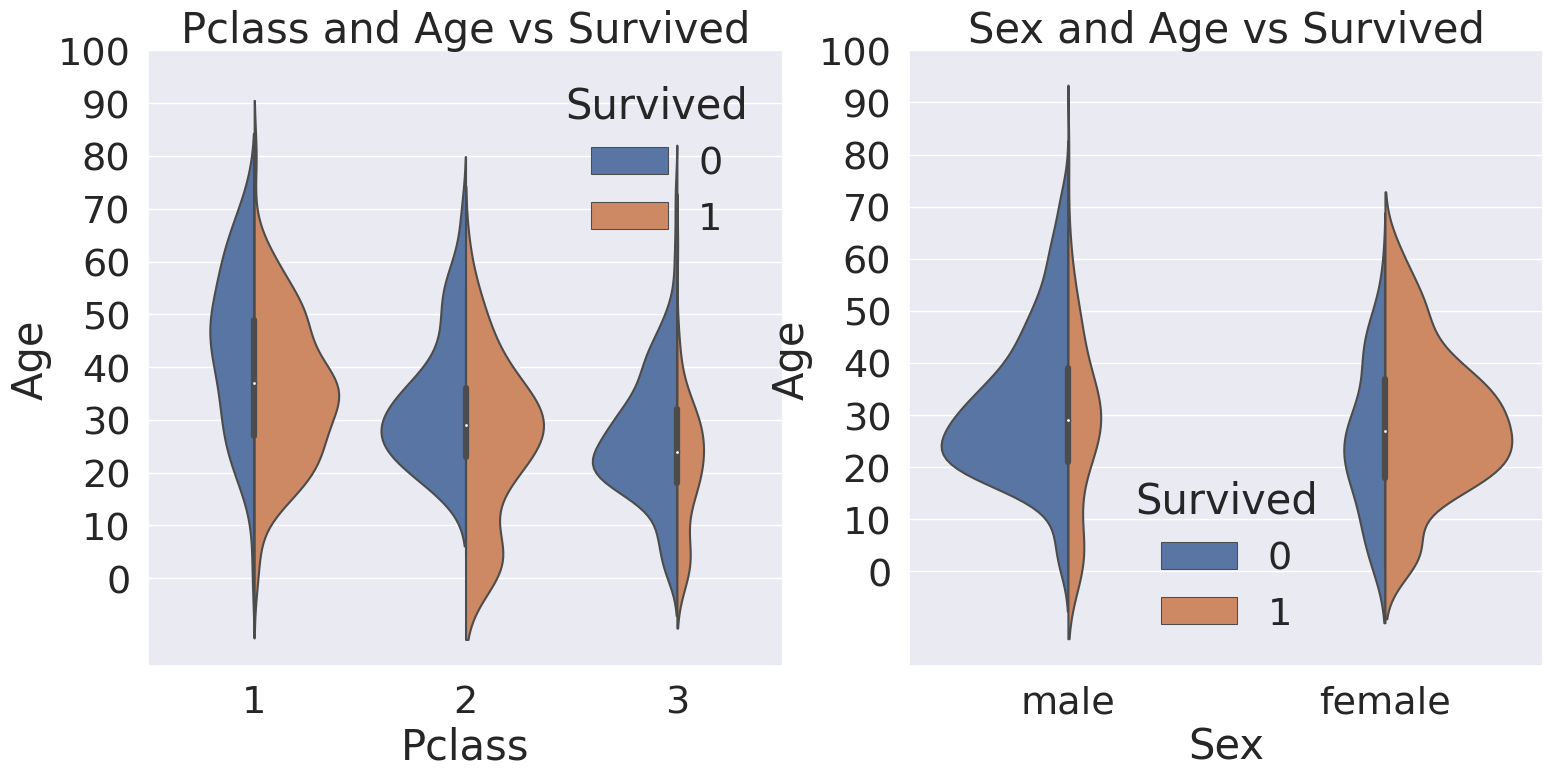

In [58]:
f,ax=plt.subplots(1,2,figsize=(18,8))
sns.violinplot(x = "Pclass", y = "Age", hue="Survived", data=df_train, scale='count', split=True,ax=ax[0]) # split = True를 안하면 pclass마다 각각 두개의 그래프가 따로 나옴
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0,110,10)) # y축 나누기
sns.violinplot(x = "Sex",y = "Age", hue="Survived", data=df_train, scale='count', split=True,ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0,110,10))
plt.show()

여성과 아이가 우선적으로 생존한 것을 볼 수 있다.

violinplot을 이용하면 두가지 features를 연관시킨 생존률을 시각화하여 볼 수 있다.

## Embarked

<AxesSubplot: xlabel='Embarked'>

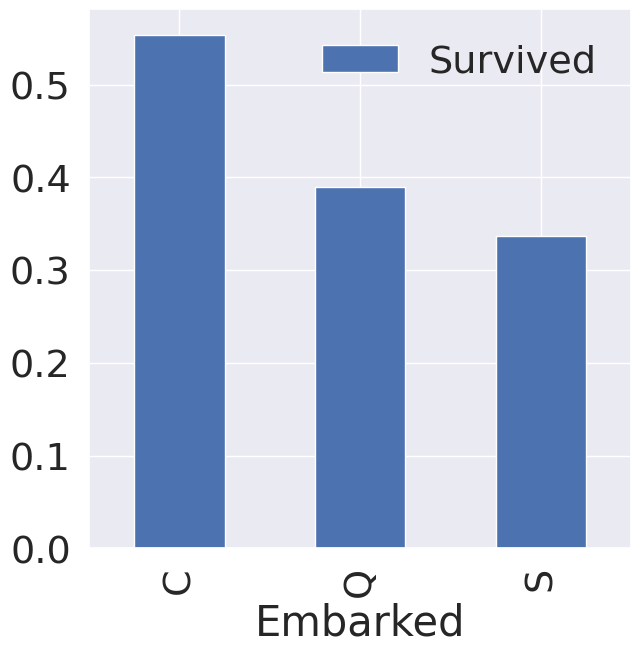

In [59]:
f, ax = plt.subplots(1, 1, figsize=(7, 7))
df_train[['Embarked', 'Survived']].groupby(['Embarked'], as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar(ax=ax)

전체 생존률이 약 40%인데, 약 50%, 40%, 30%로 Embarked에 따른 생존률의 차이는 그리 크지 않아 중요한 feature로 작용하지 않을 가능성이 있음

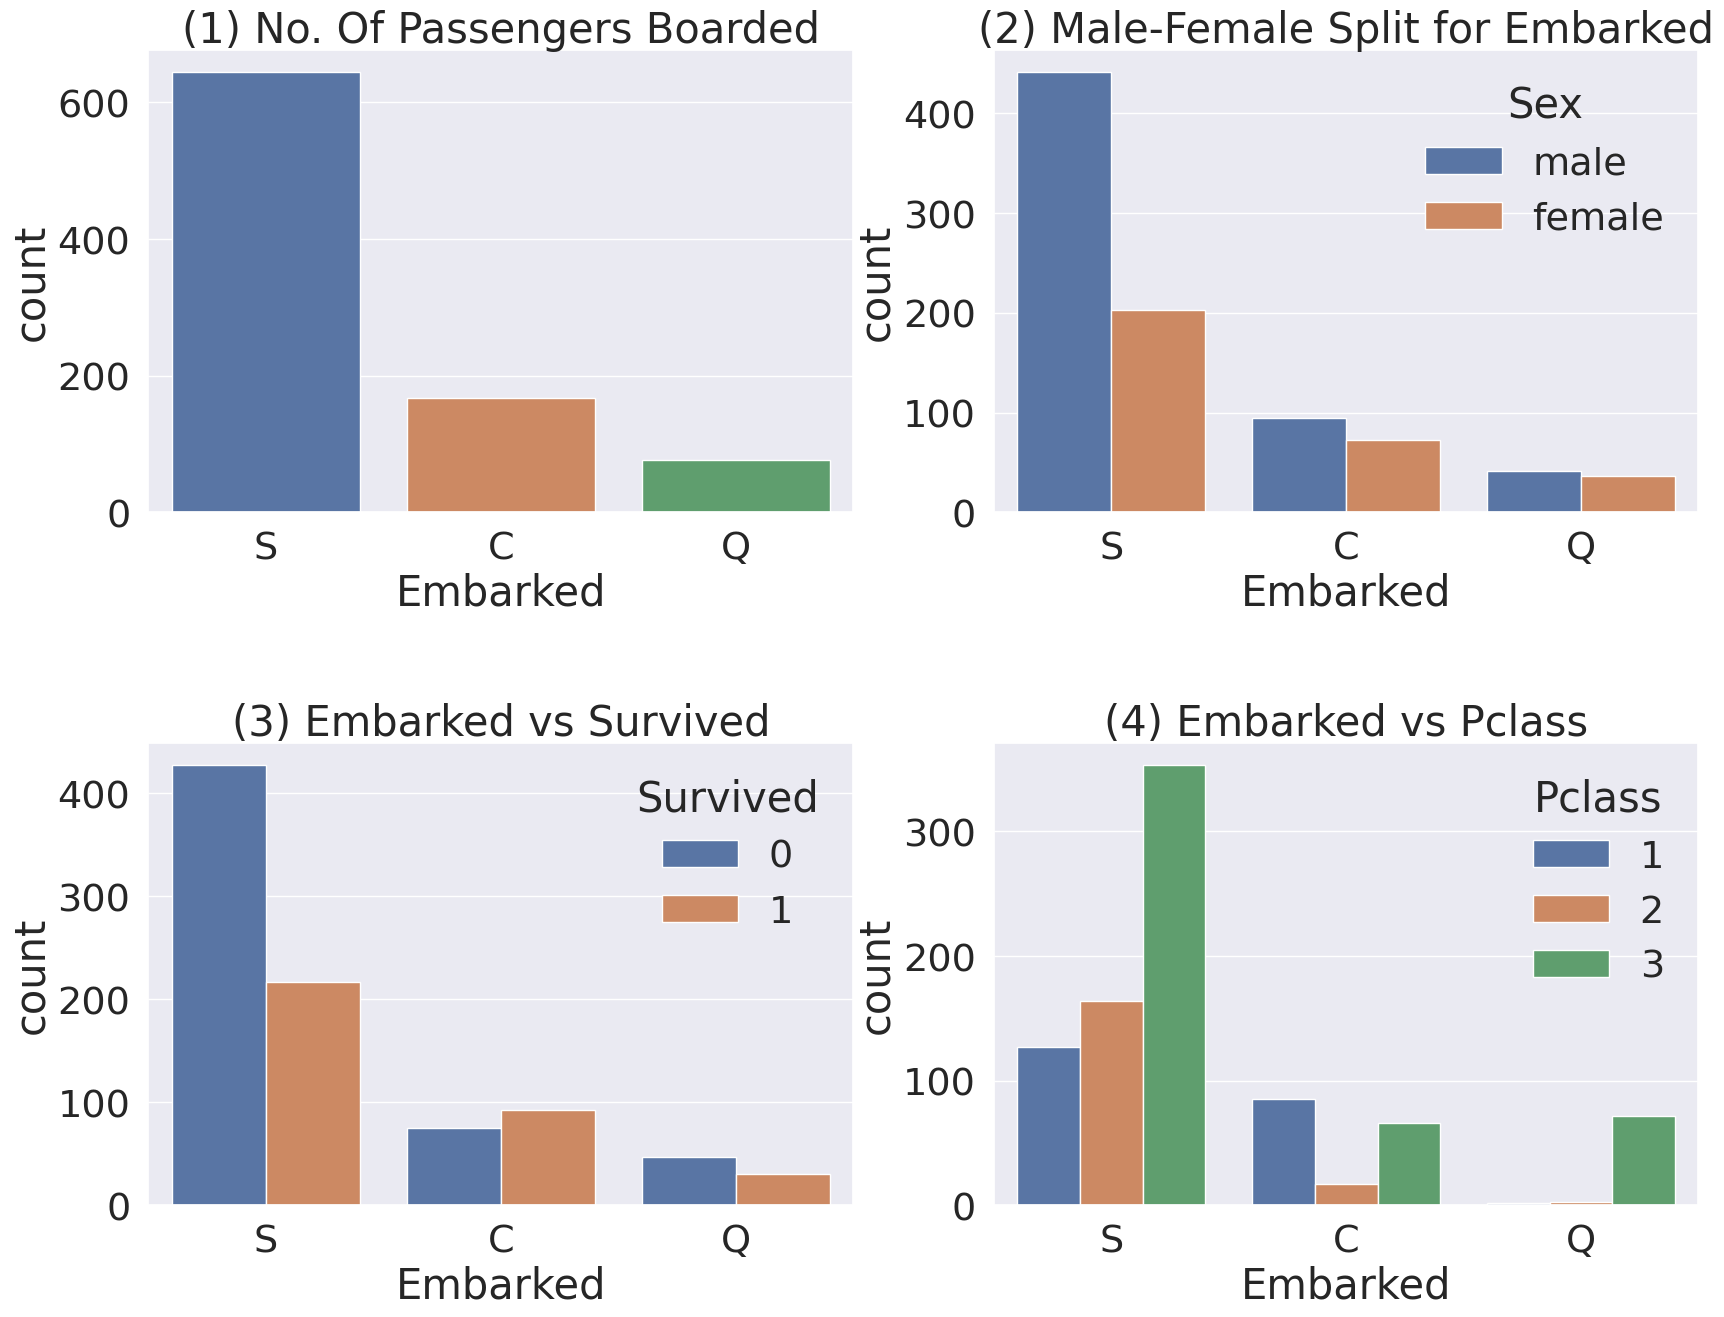

In [61]:
f,ax=plt.subplots(2, 2, figsize=(20,15))
sns.countplot(x='Embarked', data=df_train, ax=ax[0,0])
ax[0,0].set_title('(1) No. Of Passengers Boarded')
sns.countplot(x='Embarked', hue='Sex', data=df_train, ax=ax[0,1])
ax[0,1].set_title('(2) Male-Female Split for Embarked')
sns.countplot(x='Embarked', hue='Survived', data=df_train, ax=ax[1,0])
ax[1,0].set_title('(3) Embarked vs Survived')
sns.countplot(x='Embarked', hue='Pclass', data=df_train, ax=ax[1,1])
ax[1,1].set_title('(4) Embarked vs Pclass')
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

S에서 가장 많은 사람이 타고, C는 pclass 1의 비중이 높아 생존률이 좀 더 높은 것을 볼 수 있다. 그러나 Q는 대부분이 pclass 3임에도 불구하고 평균에 가까운 생존률을 보인다 / Embarked를 중요하게 쓰긴 쉽지 않을듯

## Family - SibSp+Parch

In [62]:
df_train['FamilySize'] = df_train['SibSp'] + df_train['Parch'] +1 # 본인 포함이므로 +1
df_test['FamilySize'] = df_test['SibSp'] + df_test['Parch'] +1

In [63]:
print("Maximum size of Family: ", df_train['FamilySize'].max())
print("Minimum size of Family: ", df_train['FamilySize'].min())

Maximum size of Family:  11
Minimum size of Family:  1


혼자 탄사람, 11명의 가족끼리 같이 탄 사람

In [65]:
print(df_train[df_train['FamilySize'] == 11]) # FamilySize는 11인데 자료가 있는 사람은 7명밖에 없음

     PassengerId  Survived  Pclass                               Name     Sex  \
159          160         0       3         Sage, Master. Thomas Henry    male   
180          181         0       3       Sage, Miss. Constance Gladys  female   
201          202         0       3                Sage, Mr. Frederick    male   
324          325         0       3           Sage, Mr. George John Jr    male   
792          793         0       3            Sage, Miss. Stella Anna  female   
846          847         0       3           Sage, Mr. Douglas Bullen    male   
863          864         0       3  Sage, Miss. Dorothy Edith "Dolly"  female   

     Age  SibSp  Parch    Ticket   Fare Cabin Embarked  FamilySize  
159  NaN      8      2  CA. 2343  69.55   NaN        S          11  
180  NaN      8      2  CA. 2343  69.55   NaN        S          11  
201  NaN      8      2  CA. 2343  69.55   NaN        S          11  
324  NaN      8      2  CA. 2343  69.55   NaN        S          11  
792  N

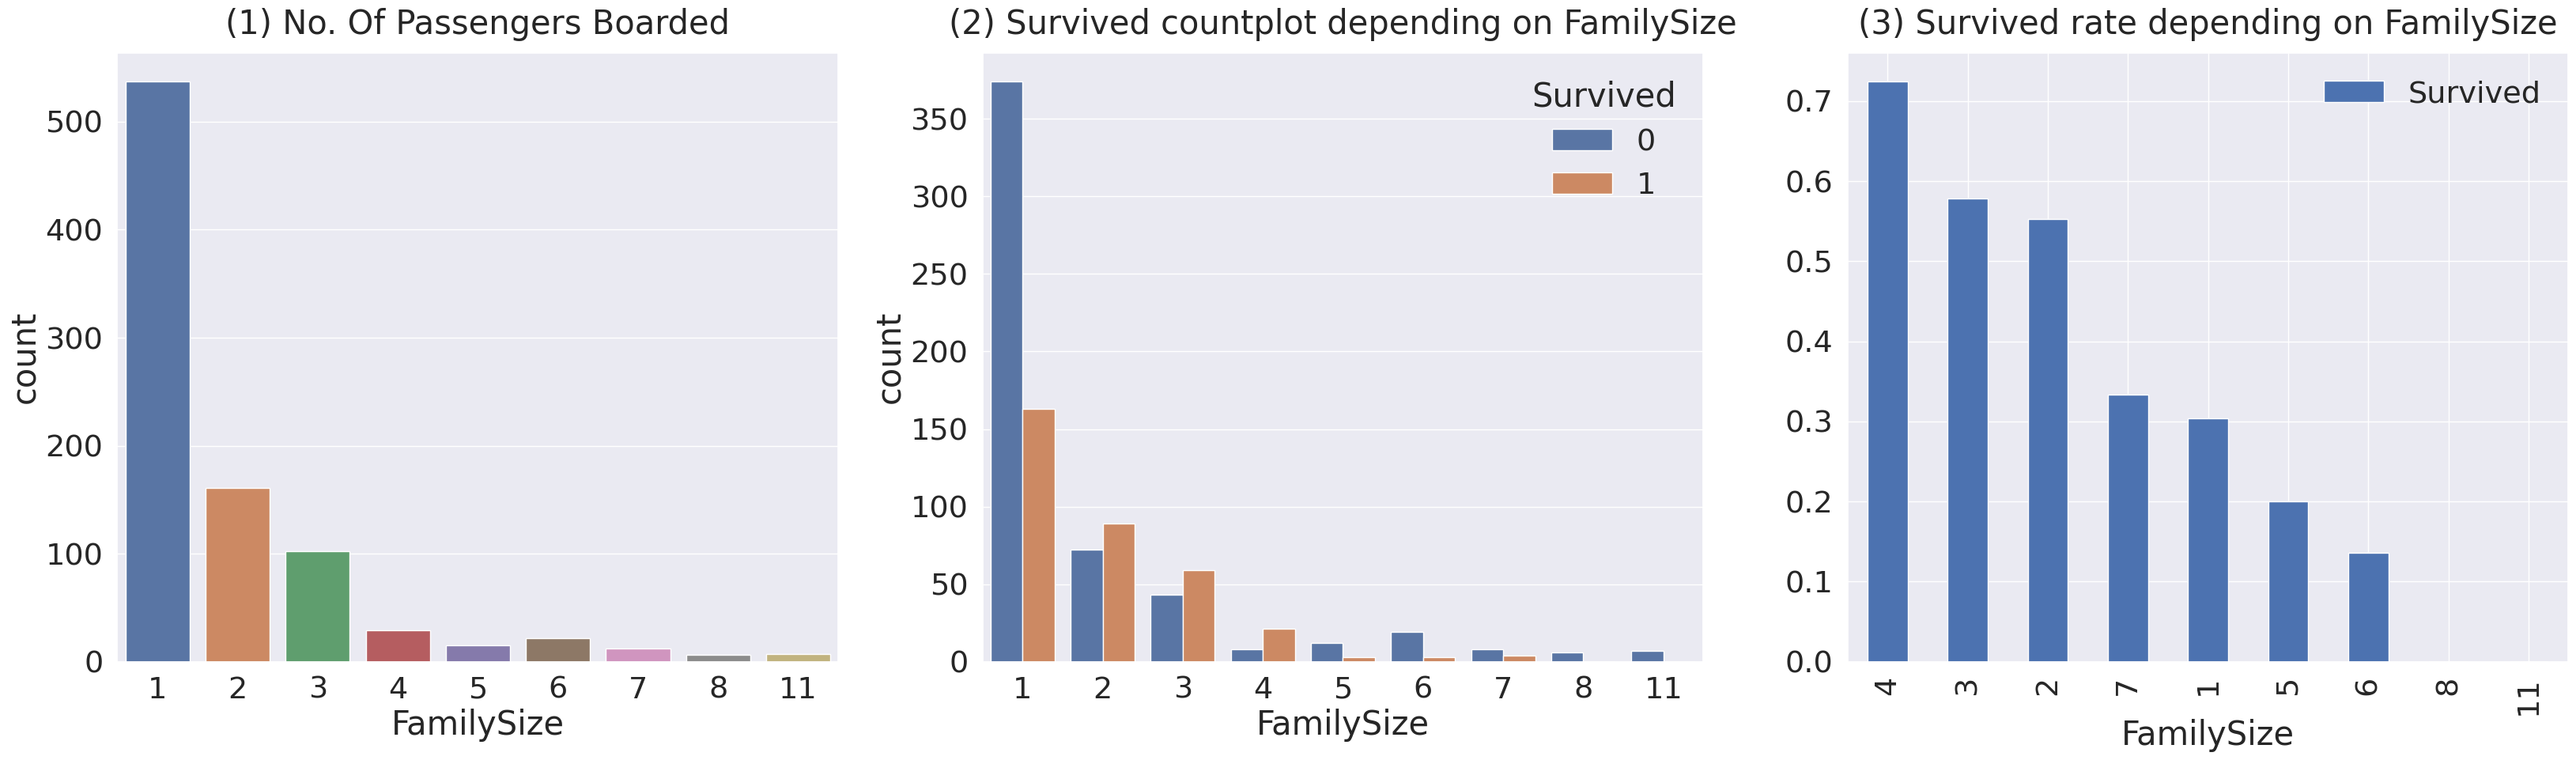

In [67]:
f,ax=plt.subplots(1, 3, figsize=(40,10))
sns.countplot(x='FamilySize', data=df_train, ax=ax[0])
ax[0].set_title('(1) No. Of Passengers Boarded', y=1.02)

sns.countplot(x='FamilySize', hue='Survived', data=df_train, ax=ax[1])
ax[1].set_title('(2) Survived countplot depending on FamilySize',  y=1.02)

df_train[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar(ax=ax[2])
ax[2].set_title('(3) Survived rate depending on FamilySize',  y=1.02)

plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

FamilySize가 2,3,4일때 평균 생존률을 상회하는 것을 알 수 있다. 가족이 너무 많아도 생존 확률이 떨어진다.

## Fare

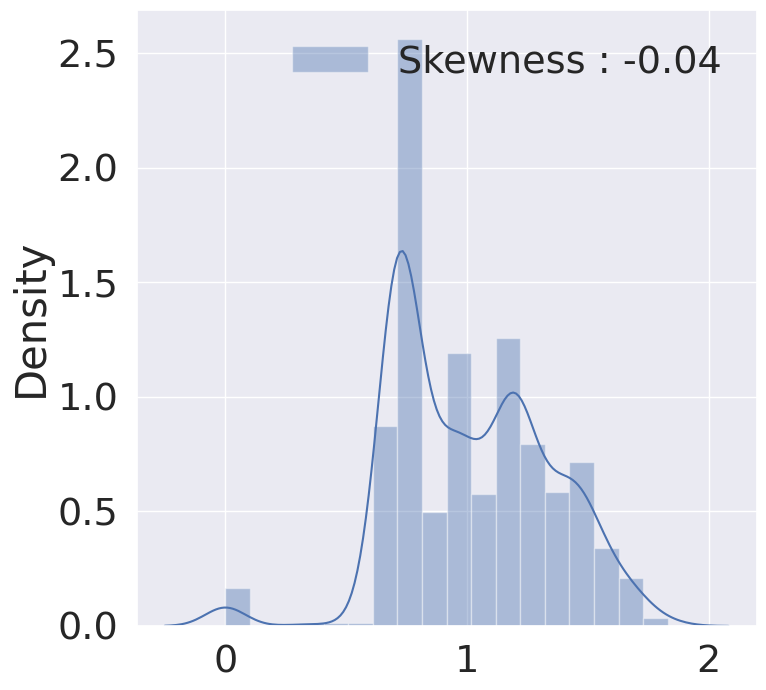

In [81]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
g = sns.distplot(x = df_train['Fare'], color='b', label='Skewness : {:.2f}'.format(df_train['Fare'].skew()), ax=ax)
g = g.legend(loc='best')

In [92]:
df_train.loc[df_test.Fare.isnull(), 'Fare'] = df_test['Fare'].mean()
df_test.loc[df_test.Fare.isnull(), 'Fare'] = df_test['Fare'].mean() # testset 에 있는 nan value 를 평균값으로 치환

df_train['Fare'] = df_train['Fare'].map(lambda i: np.log(i) if i > 0 else 0) # map으로 모두 똑같은 작업을 해줄 수 있다.
df_test['Fare'] = df_test['Fare'].map(lambda i: np.log(i) if i > 0 else 0)

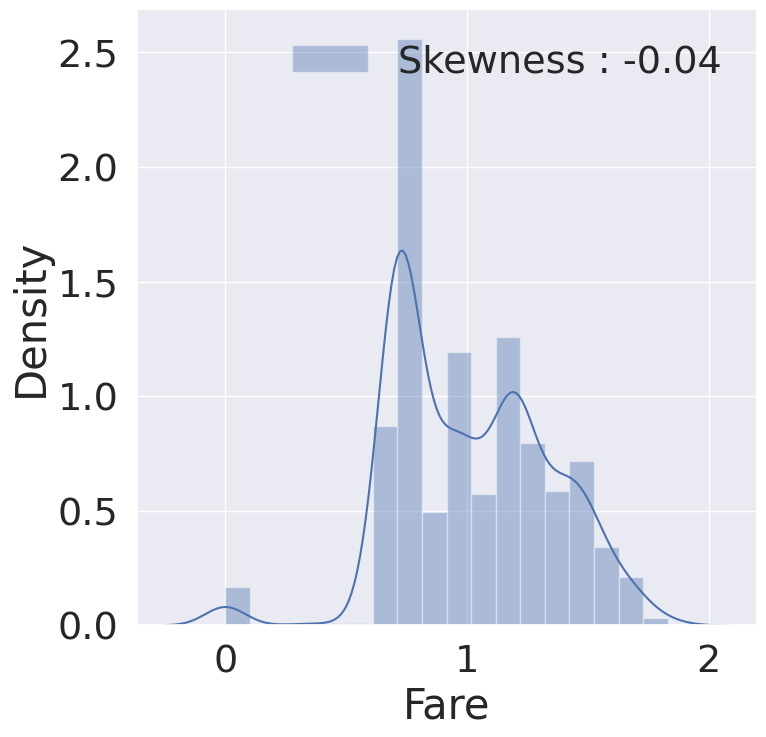

In [83]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
g = sns.distplot(df_train['Fare'], color='b', label='Skewness : {:.2f}'.format(df_train['Fare'].skew()), ax=ax)
g = g.legend(loc='best')

skewness 값이 달라서 강의와 약간 다른 결과가 나오는 듯

## Cabin, Ticket

Cabin은 NaN이 대부분이므로 사용하지 않음

In [80]:
len(df_train['Ticket'].unique()) #개별 값이 681개
df_train['Ticket'].value_counts()

347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: Ticket, Length: 681, dtype: int64

Ticket은 다양한 값이 많은 string이라서 사용하기 힘드므로 제외